In [47]:
# import dependencies
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

**Initially was going to pull data from TomTom & Here API**

In [2]:
# Save config information
# ATL_query_url = "https://api.tomtom.com/traffic/services/4/incidentDetails/s3/6841263.950712%2C511972.674418%2C6886056.049288%2C582676.925582/10/-1/json?key=KEY"


In [3]:
# ATL_response = requests.get(ATL_query_url)
# ATL_json = ATL_response.json()

# ATL_response = json.loads(ATL_response.content.decode('utf-8'))
# print(ATL_response)

# print(json.loads(ATL_response.content.decode('utf-8')))

In [4]:
# query_url = 'https://traffic.ls.hereapi.com/traffic/6.3/incidents.json?apiKey=GOlqCjGPNjWRXr5ygmE_kBXSBYzMklXWGeM62HxlwdQ&bbox=33.826,-84.222;33.671,-84.561'


In [5]:
# response = requests.get(query_url)
# json = response.json()
# json

**Reading in CSVs**

In [7]:
#read atlanta crash csv and update data frame 
atl_crashes = pd.read_csv("../data/atlanta_crashes.csv")
atl_crashes = atl_crashes.dropna()
atl_crashes

,date,atl_crashes
1,2004-01-01,3.0
2,2004-02-01,3.0
3,2004-03-01,8.0
4,2004-04-01,8.0
5,2004-05-01,5.0
...,...,...
176,2018-08-01,10.0
177,2018-09-01,5.0
178,2018-10-01,0.0
179,2018-11-01,7.0


In [8]:
#read pittsburgh crash csv and update data frame 
pitt_crashes = pd.read_csv("../data/pittsburgh_crashes.csv")
pitt_crashes = pitt_crashes.dropna()
pitt_crashes

,date,pitt_crashes
1,2004-01-01,3.0
2,2004-02-01,3.0
3,2004-03-01,2.0
4,2004-04-01,2.0
5,2004-05-01,2.0
...,...,...
176,2018-08-01,0.0
177,2018-09-01,2.0
178,2018-10-01,1.0
179,2018-11-01,2.0


In [9]:
#read cincinnati crash csv and update data frame 
cinn_crashes = pd.read_csv("../data/cincinnati_crashes.csv")
cinn_crashes = cinn_crashes.dropna()
cinn_crashes

,date,cinn_crashes
1,2004-01-01,2.0
2,2004-02-01,2.0
3,2004-03-01,2.0
4,2004-04-01,4.0
5,2004-05-01,2.0
...,...,...
176,2018-08-01,3.0
177,2018-09-01,3.0
178,2018-10-01,1.0
179,2018-11-01,4.0


In [10]:
#read chico crash csv and update data frame 
chico_crashes = pd.read_csv("../data/chico_crashes.csv")
chico_crashes = chico_crashes.dropna()
chico_crashes

,date,chico_crashes
1,2004-01-01,0.0
2,2004-02-01,0.0
3,2004-03-01,0.0
4,2004-04-01,0.0
5,2004-05-01,0.0
...,...,...
176,2018-08-01,0.0
177,2018-09-01,1.0
178,2018-10-01,1.0
179,2018-11-01,1.0


In [11]:
#read brownsville crash csv and update data frame 
bville_crashes = pd.read_csv("../data/brownsville_crashes.csv")
bville_crashes = bville_crashes.dropna()
bville_crashes

,date,bville_crashes
1,2004-01-01,1.0
2,2004-02-01,1.0
3,2004-03-01,0.0
4,2004-04-01,2.0
5,2004-05-01,0.0
...,...,...
176,2018-08-01,0.0
177,2018-09-01,1.0
178,2018-10-01,2.0
179,2018-11-01,1.0


In [12]:
#read national crash csv and update data frame 
national_crashes = pd.read_csv("../data/national_crashes.csv")
national_crashes = national_crashes.dropna()
national_crashes

,date,crashes
1,2004-01-01,2939.0
2,2004-02-01,2597.0
3,2004-03-01,2877.0
4,2004-04-01,3026.0
5,2004-05-01,3438.0
...,...,...
176,2018-08-01,2986.0
177,2018-09-01,3022.0
178,2018-10-01,3081.0
179,2018-11-01,2743.0


In [12]:
national_crashes.dtypes

date        object
crashes    float64
dtype: object

In [13]:
# read in oil csv 
oil_prices = pd.read_csv("../data/oil_dow_prices.csv")
oil_prices

,Unnamed: 0,date,Crude_Oil_Price,Close Price
0,0,1985-01-01,24.26,1289.090007
1,1,1985-02-01,23.64,1283.232101
2,2,1985-03-01,23.89,1268.829997
3,3,1985-04-01,24.19,1266.358114
4,4,1985-05-01,24.18,1279.397738
...,...,...,...,...
416,416,2019-09-01,55.07,26900.213964
417,417,2019-10-01,53.14,26736.797724
418,418,2019-11-01,54.96,27797.046094
419,419,2019-12-01,58.41,28167.005768


In [14]:
oil_prices.dtypes

Unnamed: 0           int64
date                object
Crude_Oil_Price    float64
Close Price        float64
dtype: object

In [15]:
filtered_oil_prices = oil_prices[oil_prices['date'] >= '2004-01-01']
filtered_oil_prices = filtered_oil_prices[filtered_oil_prices['date'] <= '2018-12-01']
filtered_oil_prices

,Unnamed: 0,date,Crude_Oil_Price,Close Price
228,228,2004-01-01,30.35,10540.046974
229,229,2004-02-01,31.21,10601.498972
230,230,2004-03-01,32.86,10323.728262
231,231,2004-04-01,33.20,10418.404250
232,232,2004-05-01,35.73,10083.805470
...,...,...,...,...
403,403,2018-08-01,62.64,25629.988282
404,404,2018-09-01,63.54,26232.667969
405,405,2018-10-01,65.18,25609.341882
406,406,2018-11-01,55.65,25258.675316


In [48]:
filtered_oil_prices = filtered_oil_prices[['date','Crude_Oil_Price']]
index = filtered_oil_prices[(filtered_oil_prices['Crude_Oil_Price'] =='Not Available')].index

filtered_oil_prices.drop(index, inplace=True)

filtered_oil_prices

/Users/jasmineorr/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,date,Crude_Oil_Price
228,2004-01-01,30.35
229,2004-02-01,31.21
230,2004-03-01,32.86
231,2004-04-01,33.20
232,2004-05-01,35.73
...,...,...
403,2018-08-01,62.64
404,2018-09-01,63.54
405,2018-10-01,65.18
406,2018-11-01,55.65


In [49]:
merged_national_data = filtered_oil_prices.merge(national_crashes, on = 'date')
merged_national_data

,date,Crude_Oil_Price,crashes
0,2004-01-01,30.35,2939.0
1,2004-02-01,31.21,2597.0
2,2004-03-01,32.86,2877.0
3,2004-04-01,33.20,3026.0
4,2004-05-01,35.73,3438.0
...,...,...,...
175,2018-08-01,62.64,2986.0
176,2018-09-01,63.54,3022.0
177,2018-10-01,65.18,3081.0
178,2018-11-01,55.65,2743.0


**Running Regression Analysis on Data**

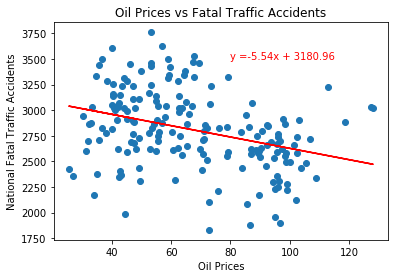

r-squared: 0.11666121888145412


In [18]:
x_values = merged_national_data['Crude_Oil_Price']
y_values = merged_national_data['crashes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,3500),fontsize=10,color="red")
plt.xlabel('Oil Prices')
plt.ylabel('National Fatal Traffic Accidents')
plt.title("Oil Prices vs Fatal Traffic Accidents")
plt.show()
print ("r-squared:", rvalue**2)


In [19]:
merged_pitt_data = filtered_oil_prices.merge(pitt_crashes, on='date')
merged_pitt_data

,date,Crude_Oil_Price,pitt_crashes
0,2004-01-01,30.35,3.0
1,2004-02-01,31.21,3.0
2,2004-03-01,32.86,2.0
3,2004-04-01,33.20,2.0
4,2004-05-01,35.73,2.0
...,...,...,...
175,2018-08-01,62.64,0.0
176,2018-09-01,63.54,2.0
177,2018-10-01,65.18,1.0
178,2018-11-01,55.65,2.0


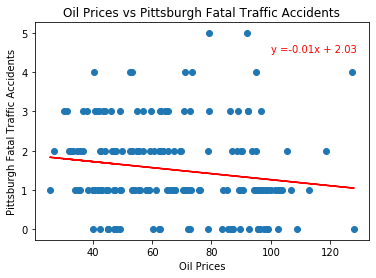

r-squared: 0.02527646709318017


In [20]:
x_values = merged_pitt_data['Crude_Oil_Price']
y_values = merged_pitt_data['pitt_crashes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,4.5),fontsize=10,color="red")
plt.xlabel('Oil Prices')
plt.ylabel('Pittsburgh Fatal Traffic Accidents')
plt.title("Oil Prices vs Pittsburgh Fatal Traffic Accidents")
plt.show()
print ("r-squared:", rvalue**2)

In [21]:
merged_bville_data = filtered_oil_prices.merge(bville_crashes, on='date')
merged_bville_data

,date,Crude_Oil_Price,bville_crashes
0,2004-01-01,30.35,1.0
1,2004-02-01,31.21,1.0
2,2004-03-01,32.86,0.0
3,2004-04-01,33.20,2.0
4,2004-05-01,35.73,0.0
...,...,...,...
175,2018-08-01,62.64,0.0
176,2018-09-01,63.54,1.0
177,2018-10-01,65.18,2.0
178,2018-11-01,55.65,1.0


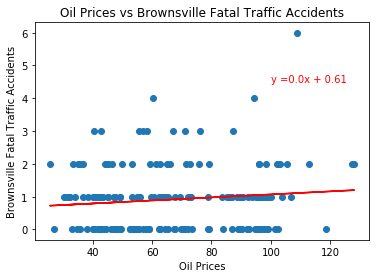

r-squared: 0.011652497401859292


In [22]:
x_values = merged_bville_data['Crude_Oil_Price']
y_values = merged_bville_data['bville_crashes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,4.5),fontsize=10,color="red")
plt.xlabel('Oil Prices')
plt.ylabel('Brownsville Fatal Traffic Accidents')
plt.title("Oil Prices vs Brownsville Fatal Traffic Accidents")
plt.show()
print ("r-squared:", rvalue**2)

In [23]:
merged_chico_data = filtered_oil_prices.merge(chico_crashes, on='date')
merged_chico_data

,date,Crude_Oil_Price,chico_crashes
0,2004-01-01,30.35,0.0
1,2004-02-01,31.21,0.0
2,2004-03-01,32.86,0.0
3,2004-04-01,33.20,0.0
4,2004-05-01,35.73,0.0
...,...,...,...
175,2018-08-01,62.64,0.0
176,2018-09-01,63.54,1.0
177,2018-10-01,65.18,1.0
178,2018-11-01,55.65,1.0


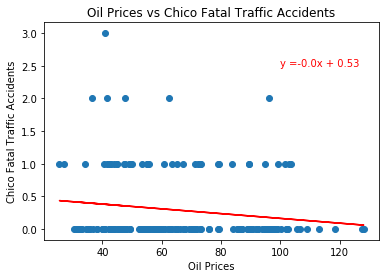

r-squared: 0.025304089832688573


In [24]:
x_values = merged_chico_data['Crude_Oil_Price']
y_values = merged_chico_data['chico_crashes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,2.5),fontsize=10,color="red")
plt.xlabel('Oil Prices')
plt.ylabel('Chico Fatal Traffic Accidents')
plt.title("Oil Prices vs Chico Fatal Traffic Accidents")
plt.show()
print ("r-squared:", rvalue**2)

In [25]:
merged_atl_data = filtered_oil_prices.merge(atl_crashes, on='date')
merged_atl_data

,date,Crude_Oil_Price,atl_crashes
0,2004-01-01,30.35,3.0
1,2004-02-01,31.21,3.0
2,2004-03-01,32.86,8.0
3,2004-04-01,33.20,8.0
4,2004-05-01,35.73,5.0
...,...,...,...
175,2018-08-01,62.64,10.0
176,2018-09-01,63.54,5.0
177,2018-10-01,65.18,0.0
178,2018-11-01,55.65,7.0


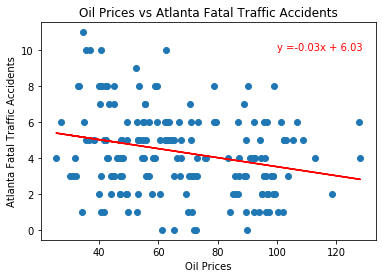

r-squared: 0.06623048713514434


In [26]:
x_values = merged_atl_data['Crude_Oil_Price']
y_values = merged_atl_data['atl_crashes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,10),fontsize=10,color="red")
plt.xlabel('Oil Prices')
plt.ylabel('Atlanta Fatal Traffic Accidents')
plt.title("Oil Prices vs Atlanta Fatal Traffic Accidents")
plt.show()
print ("r-squared:", rvalue**2)

In [27]:
merged_cinn_data = filtered_oil_prices.merge(cinn_crashes, on='date')
merged_cinn_data

,date,Crude_Oil_Price,cinn_crashes
0,2004-01-01,30.35,2.0
1,2004-02-01,31.21,2.0
2,2004-03-01,32.86,2.0
3,2004-04-01,33.20,4.0
4,2004-05-01,35.73,2.0
...,...,...,...
175,2018-08-01,62.64,3.0
176,2018-09-01,63.54,3.0
177,2018-10-01,65.18,1.0
178,2018-11-01,55.65,4.0


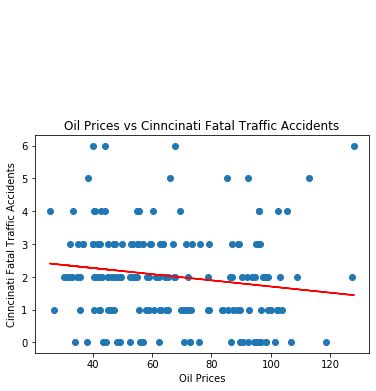

r-squared: 0.024133281742832306


In [28]:
x_values = merged_cinn_data['Crude_Oil_Price']
y_values = merged_cinn_data['cinn_crashes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,10),fontsize=10,color="red")
plt.xlabel('Oil Prices')
plt.ylabel('Cinncinati Fatal Traffic Accidents')
plt.title("Oil Prices vs Cinncinati Fatal Traffic Accidents")
plt.show()
print ("r-squared:", rvalue**2)

**Performing Basic Machine Learning Linear Regression on Atlanta Data**

In [29]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


In [30]:
merged_atl_data

,date,Crude_Oil_Price,atl_crashes
0,2004-01-01,30.35,3.0
1,2004-02-01,31.21,3.0
2,2004-03-01,32.86,8.0
3,2004-04-01,33.20,8.0
4,2004-05-01,35.73,5.0
...,...,...,...
175,2018-08-01,62.64,10.0
176,2018-09-01,63.54,5.0
177,2018-10-01,65.18,0.0
178,2018-11-01,55.65,7.0


In [31]:
X = merged_atl_data["Crude_Oil_Price"].values.reshape(-1, 1)
y = merged_atl_data["atl_crashes"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (180, 1) (180, 1)


In [32]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [33]:
# Create the model
model = LinearRegression()

In [34]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 4.327894918732222
R-squared (R2 ): -0.05159433770491395


In [38]:
monthly_totals = pd.read_csv("../data/monthly_totals.csv")
monthly_totals = monthly_totals[['date','Crude_Oil_Price', 'crashes']]
monthly_totals

,date,Crude_Oil_Price,crashes
0,January,61.49,37217
1,February,62.63,33999
2,March,65.71,38709
3,April,68.72,40171
4,May,69.36,43916
5,June,70.06,44276
6,July,71.17,46331
7,August,69.83,46268
8,September,69.07,44485
9,October,67.73,46037


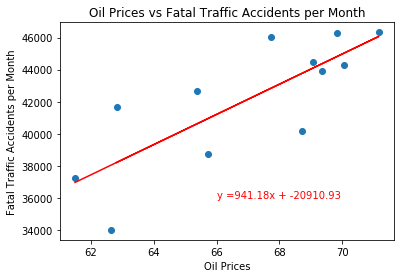

r-squared: 0.6236357121003718


In [39]:
x_values = monthly_totals['Crude_Oil_Price']
y_values = monthly_totals['crashes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(66, 36000),fontsize=10,color="red")
plt.xlabel('Oil Prices')
plt.ylabel('Fatal Traffic Accidents per Month')
plt.title("Oil Prices vs Fatal Traffic Accidents per Month")
plt.show()
print ("r-squared:", rvalue**2)

In [40]:
X = merged_atl_data["Crude_Oil_Price"].values.reshape(-1, 1)
y = merged_atl_data["atl_crashes"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (180, 1) (180, 1)


In [41]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
# Create the model
model = LinearRegression()

In [43]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 4.327894918732222
R-squared (R2 ): -0.05159433770491395
